Inicijalizacija

In [9]:
import numpy as np
states=[
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]
short = { "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY" }
short2=[]
for i in range(0,50):
    short2.append(short[states[i]])

fajl="FCRezultati.txt"

Ucitavanja podataka

In [10]:
ulaz= np.loadtxt(fajl)
guess=ulaz[:,0].astype(int)
correct=ulaz[:,1].astype(int)
attempt=ulaz[:,2].astype(int)

Osnovni podaci

In [11]:
acc=0
for i in range(0,len(guess)):
    acc+=(guess[i]==correct[i])
print(acc)
print("TACNOST ",str(acc/len(guess)))
primeraka=[]
for i in range(0,50):
    primeraka.append(0)
for i in range(0,len(correct)):
    #print(correct[i])
    primeraka[correct[i]]+=1
#print(primeraka[0])
print(primeraka)

6258
TACNOST  0.25035004200504063
[499, 500, 500, 500, 500, 500, 499, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 499, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


Konfuziona matrica

0 499
1 500
2 500
3 500
4 500
5 500
6 499
7 500
8 500
9 500
10 500
11 500
12 500
13 500
14 500
15 500
16 500
17 500
18 500
19 500
20 500
21 500
22 500
23 500
24 500
25 500
26 500
27 500
28 500
29 500
30 500
31 500
32 500
33 500
34 500
35 500
36 500
37 500
38 499
39 500
40 500
41 500
42 500
43 500
44 500
45 500
46 500
47 500
48 500
49 500


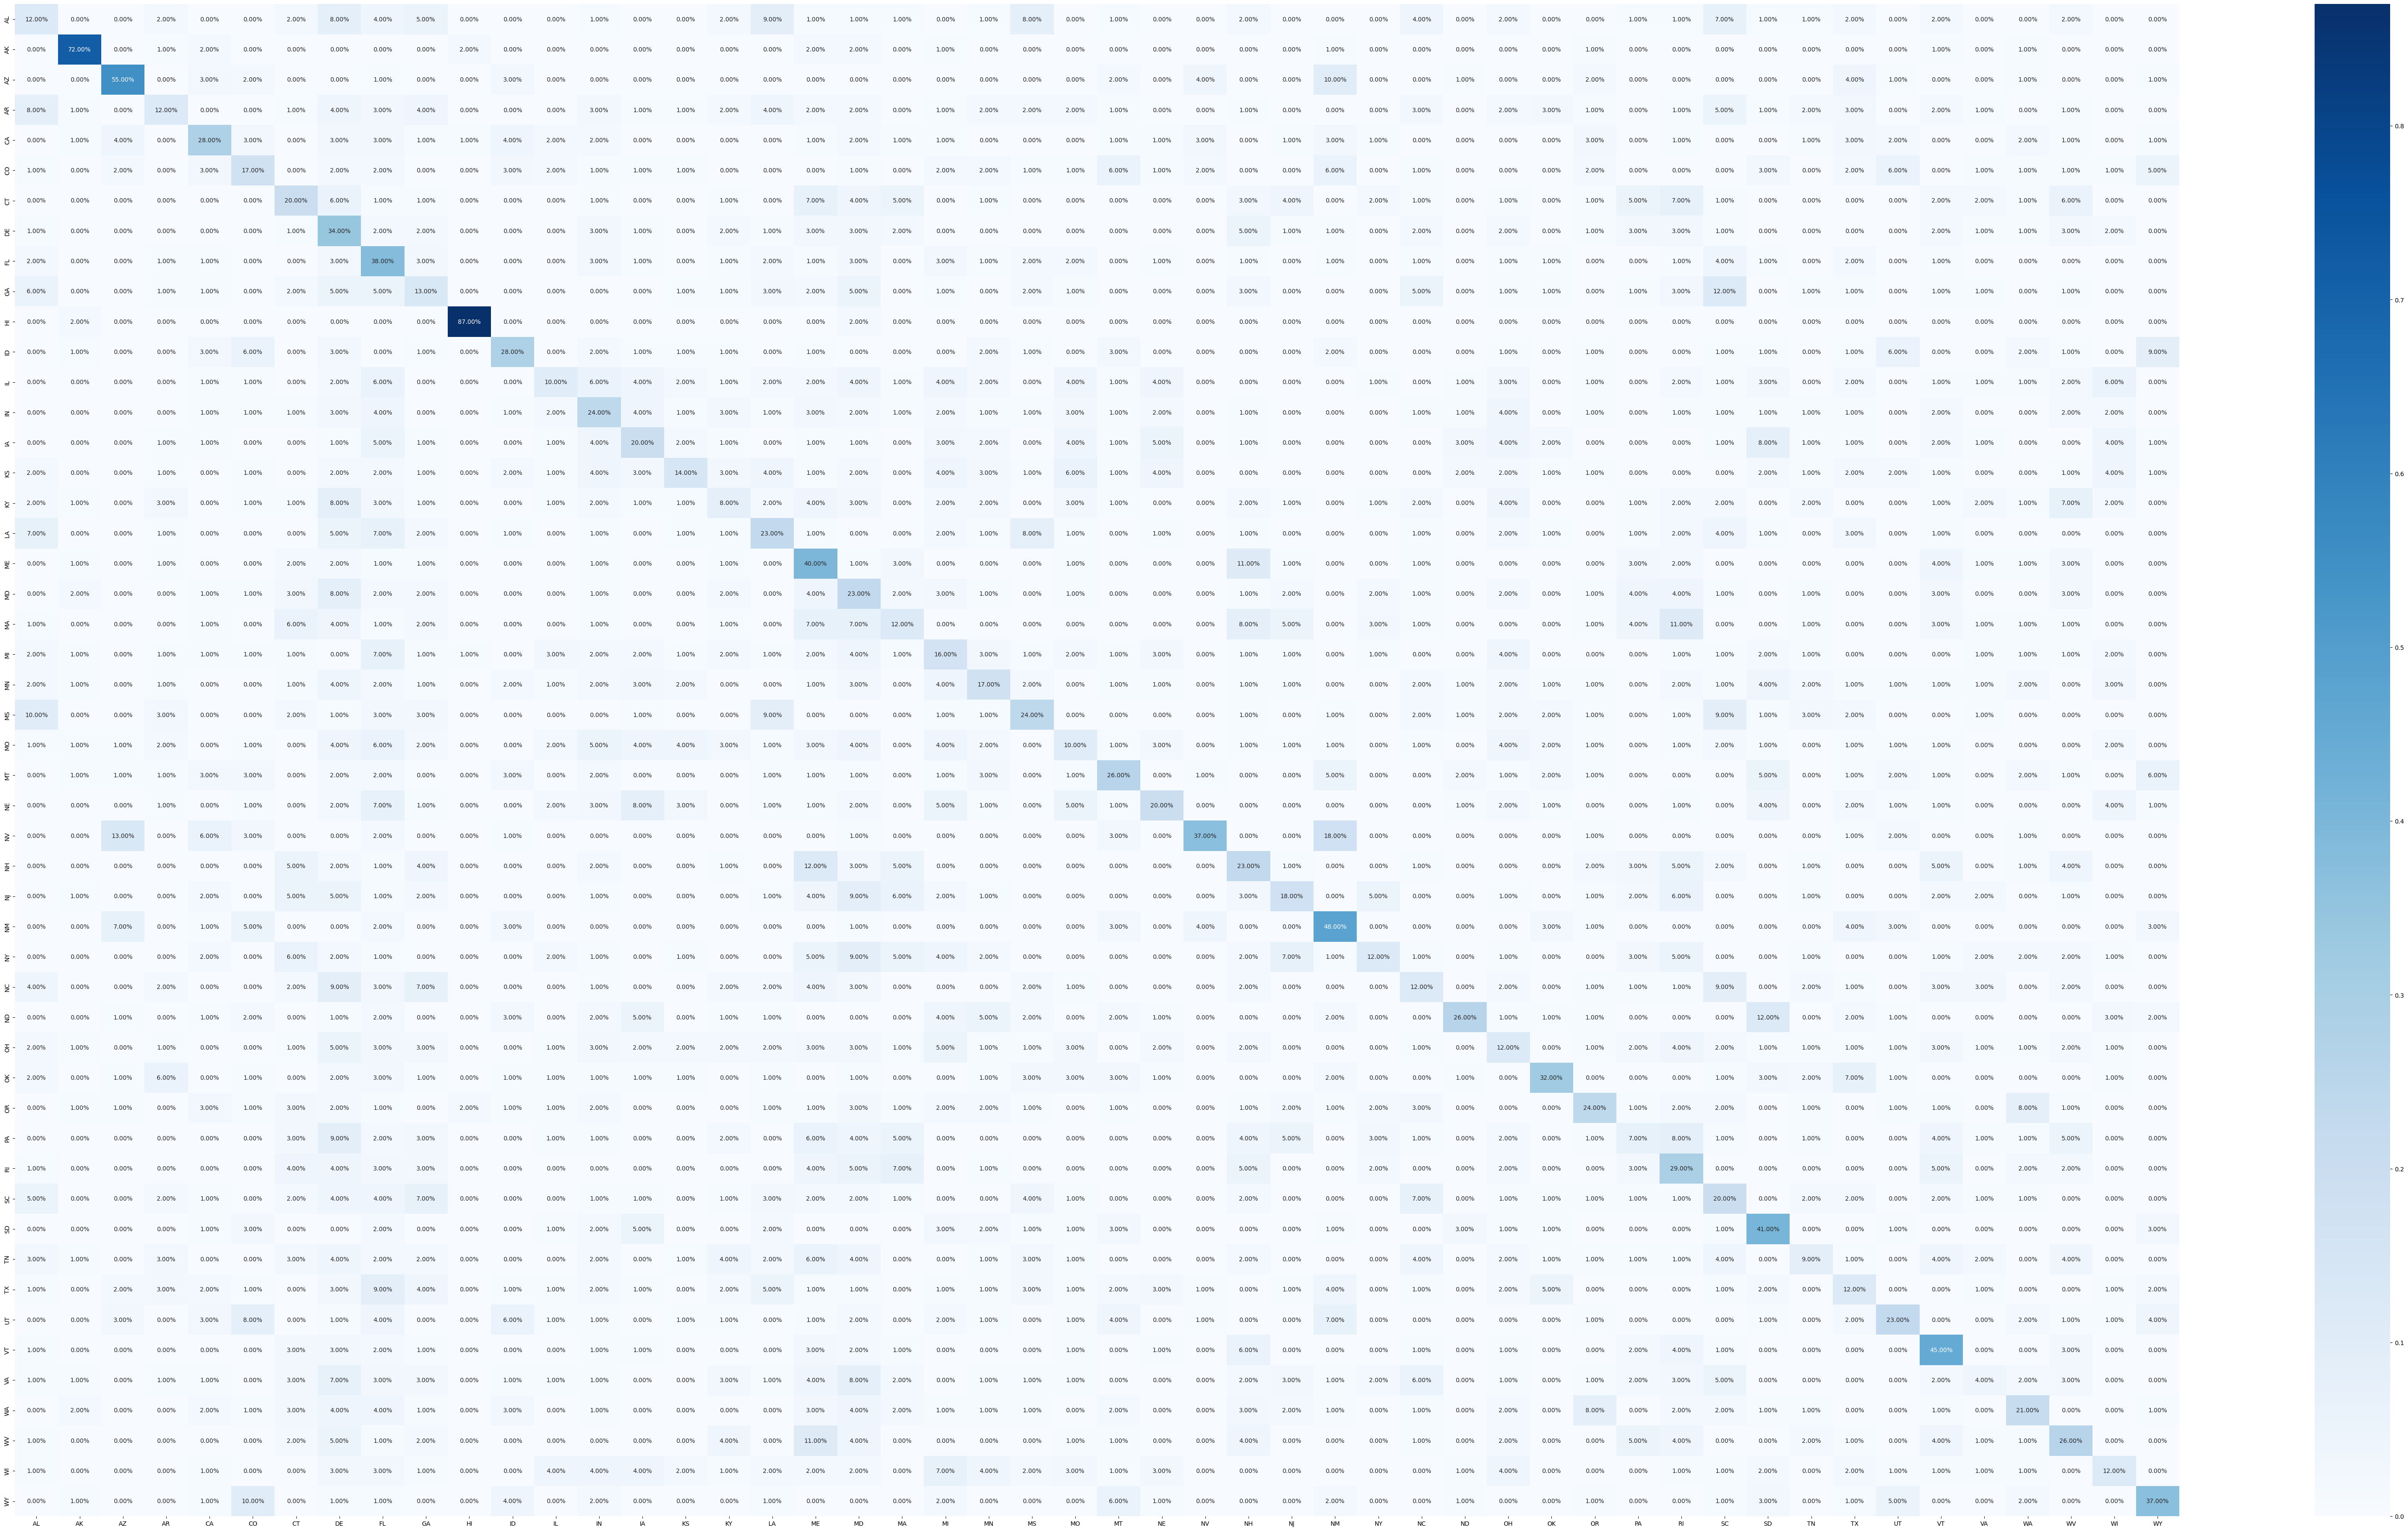

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(correct, guess)

for i in range(0, 50):
    p = np.sum(cf_matrix[i])
    cf_matrix[i] = cf_matrix[i] * 100 / p

plt.figure(figsize=(80, 45))
sns.heatmap(cf_matrix/100, annot=True, fmt='.2%', cmap='Blues',xticklabels=short2, yticklabels=short2)
plt.show()

Plotovanje na mapi

In [13]:
import plotly.express as px

def napravi_mapu(podaci,inv=False):
    data=[]
    for i in range(50):
        data.append({'state_code': short[states[i]], 'value': podaci[i]})
    paleta=[(0,'red'),(1,'green')]
    if inv:
        paleta=[(0,'green'),(1,'red')]
    # Create a DataFrame from the data
    import pandas as pd
    df = pd.DataFrame(data)

    # Create the choropleth map using Plotly Express
    fig = px.choropleth(
        data_frame=df,
        locations='state_code',  # Using state codes instead of state names
        locationmode='USA-states',
        scope='usa',
        color='value',
        hover_name='state_code',  # Show state codes on hover
        color_continuous_scale=paleta,  # Choose the color scale you prefer
        title='Choropleth Map of USA'
    )

    # Show the map
    fig.show()

Tacnost

In [14]:
def get_tacnih(tresh):
    tacnih=[]
    for i in range(50):
        tacnih.append(0)
    for i in range(len(correct)):
        if attempt[i]<=tresh:
            tacnih[correct[i]]+=1/primeraka[correct[i]]
    return tacnih
def get_miss():
    missed=[]
    for i in range(50):
        missed.append(0)
    for i in range(len(correct)):
        if correct[i]!=guess[i]:
            missed[guess[i]]+=1/(len(correct))
    return missed

In [15]:
napravi_mapu(get_tacnih(1))
napravi_mapu(get_miss(),True)